In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sns.set(style='whitegrid', font_scale=1.5)

# Data Setup

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936743 entries, 0 to 936742
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    936743 non-null  object 
 1   county  936743 non-null  object 
 2   state   936743 non-null  object 
 3   fips    927998 non-null  float64
 4   cases   936743 non-null  int64  
 5   deaths  916734 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 42.9+ MB


In [40]:
data.describe()

,fips,cases,deaths
count,927998.000000,9.367430e+05,916734.000000
mean,31272.235882,2.220427e+03,57.090916
std,16300.652394,1.163864e+04,461.272771
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.100000e+01,0.000000
50%,29217.000000,2.650000e+02,5.000000
75%,46101.000000,1.142000e+03,24.000000
max,78030.000000,1.004322e+06,25970.000000


In [41]:
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [42]:
data.tail()

,date,county,state,fips,cases,deaths
936738,2021-01-16,Sweetwater,Wyoming,56037.0,3280,26.0
936739,2021-01-16,Teton,Wyoming,56039.0,2614,4.0
936740,2021-01-16,Uinta,Wyoming,56041.0,1813,9.0
936741,2021-01-16,Washakie,Wyoming,56043.0,841,23.0
936742,2021-01-16,Weston,Wyoming,56045.0,602,4.0


# Outline of What Could be Done

- Convert the date to datetime (if it isn't already) then add 3 columns - one each for month, day, and year.
- Heatmap of states and/or counties?
- countplot/scatterplot (or other) of cases and deaths
- scatterplot of cases and deaths based on fips

Note:

State and county files contain FIPS codes, a standard geographic identifier, to make it easier for an analyst to combine this data with other data sets like a map file or population data.

# Exploratory Data Analysis

## Converting ```date``` Column from ```string``` to ```datetime```

In [43]:
# Checking the data type of elements in the date column

type(data['date'].iloc[0])

str

In [44]:
# Converting the elements in the date column from str to datetime

data['date'] = pd.to_datetime(data['date'])

In [45]:
# Creating 4 new columns based on month, day, day of month, and year

time = data['date'].iloc[0]

data['month'] = data['date'].apply(lambda time: time.month_name())
data['day'] = data['date'].apply(lambda time: time.day_name())
data['day of month'] = data['date'].apply(lambda time: time.day)
data['year'] = data['date'].apply(lambda time: time.year)

In [46]:
data.head()

,date,county,state,fips,cases,deaths,month,day,day of month,year
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,January,Tuesday,21,2020
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,January,Wednesday,22,2020
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,January,Thursday,23,2020
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,January,Friday,24,2020
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,January,Friday,24,2020


## Checking for Null Values

In [47]:
data.isnull().sum()

date                0
county              0
state               0
fips             8745
cases               0
deaths          20009
month               0
day                 0
day of month        0
year                0
dtype: int64

This tells us that there are 8745 entries where the FIPS is null and 20,009 entries where the number of deaths isn't recorded

In [48]:
# Gets the total number of rows with missing values for a given column.
total = data.isnull().sum().sort_values(ascending=False)

# Gets the percentage of missing data in a column.
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

# Concatenates the total and percentage DataFrame objects to create a new table.
# The total and percentage values are set to the columns with 1 being passed in
# for the axis parameter. The keys in the table are then set to the strings
# 'total' and 'percentage'.
missing_data = pd.concat([total, percentage], axis=1, keys=['total', 'percentage'])

missing_data.head(20)

,total,percentage
deaths,20009,0.021360
fips,8745,0.009336
year,0,0.000000
day of month,0,0.000000
day,0,0.000000
month,0,0.000000
cases,0,0.000000
state,0,0.000000
county,0,0.000000
date,0,0.000000


In [49]:
data[data['deaths'].isnull()]

,date,county,state,fips,cases,deaths,month,day,day of month,year
117486,2020-05-05,Adjuntas,Puerto Rico,72001.0,3,NaN,May,Tuesday,5,2020
117487,2020-05-05,Aguada,Puerto Rico,72003.0,7,NaN,May,Tuesday,5,2020
117488,2020-05-05,Aguadilla,Puerto Rico,72005.0,11,NaN,May,Tuesday,5,2020
117489,2020-05-05,Aguas Buenas,Puerto Rico,72007.0,22,NaN,May,Tuesday,5,2020
117490,2020-05-05,Aibonito,Puerto Rico,72009.0,13,NaN,May,Tuesday,5,2020
...,...,...,...,...,...,...,...,...,...,...
935900,2021-01-16,Vega Baja,Puerto Rico,72145.0,2423,NaN,January,Saturday,16,2021
935901,2021-01-16,Vieques,Puerto Rico,72147.0,193,NaN,January,Saturday,16,2021
935902,2021-01-16,Villalba,Puerto Rico,72149.0,647,NaN,January,Saturday,16,2021
935903,2021-01-16,Yabucoa,Puerto Rico,72151.0,886,NaN,January,Saturday,16,2021


In [50]:
data[data['fips'].isnull()]

,date,county,state,fips,cases,deaths,month,day,day of month,year
416,2020-03-01,New York City,New York,NaN,1,0.0,March,Sunday,1,2020
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0,March,Sunday,1,2020
448,2020-03-02,New York City,New York,NaN,1,0.0,March,Monday,2,2020
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0,March,Monday,2,2020
482,2020-03-03,New York City,New York,NaN,2,0.0,March,Tuesday,3,2020
...,...,...,...,...,...,...,...,...,...,...
935897,2021-01-16,Unknown,Puerto Rico,NaN,4099,1703.0,January,Saturday,16,2021
935909,2021-01-16,Unknown,Rhode Island,NaN,12765,84.0,January,Saturday,16,2021
936110,2021-01-16,Unknown,Tennessee,NaN,12888,121.0,January,Saturday,16,2021
936397,2021-01-16,Unknown,Utah,NaN,1177,2.0,January,Saturday,16,2021


In [51]:
data[data['county'] == 'Unknown']

,date,county,state,fips,cases,deaths,month,day,day of month,year
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0,March,Sunday,1,2020
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0,March,Monday,2,2020
485,2020-03-03,Unknown,Rhode Island,NaN,2,0.0,March,Tuesday,3,2020
522,2020-03-04,Unknown,Rhode Island,NaN,2,0.0,March,Wednesday,4,2020
569,2020-03-05,Unknown,Rhode Island,NaN,2,0.0,March,Thursday,5,2020
...,...,...,...,...,...,...,...,...,...,...
935897,2021-01-16,Unknown,Puerto Rico,NaN,4099,1703.0,January,Saturday,16,2021
935909,2021-01-16,Unknown,Rhode Island,NaN,12765,84.0,January,Saturday,16,2021
936110,2021-01-16,Unknown,Tennessee,NaN,12888,121.0,January,Saturday,16,2021
936397,2021-01-16,Unknown,Utah,NaN,1177,2.0,January,Saturday,16,2021


# Analysis of COVID-19 in the United States, 2020

In [52]:
data_2020 = data[(data['year'] == 2020) & (data['month'] == 'December') & (data['day of month'] == 31)].sort_values('cases', ascending=False)

In [53]:
data_2020

,date,county,state,fips,cases,deaths,month,day,day of month,year
881776,2020-12-31,Los Angeles,California,6037.0,770915,10345.0,December,Thursday,31,2020
883445,2020-12-31,New York City,New York,NaN,430863,25144.0,December,Thursday,31,2020
882187,2020-12-31,Cook,Illinois,17031.0,393652,8285.0,December,Thursday,31,2020
881674,2020-12-31,Maricopa,Arizona,4013.0,322449,5125.0,December,Thursday,31,2020
881936,2020-12-31,Miami-Dade,Florida,12086.0,298872,4188.0,December,Thursday,31,2020
...,...,...,...,...,...,...,...,...,...,...
884343,2020-12-31,Loving,Texas,48301.0,1,0.0,December,Thursday,31,2020
882770,2020-12-31,Unknown,Maine,NaN,1,0.0,December,Thursday,31,2020
882125,2020-12-31,Kalawao,Hawaii,15005.0,1,0.0,December,Thursday,31,2020
882564,2020-12-31,Unknown,Kansas,NaN,0,402.0,December,Thursday,31,2020


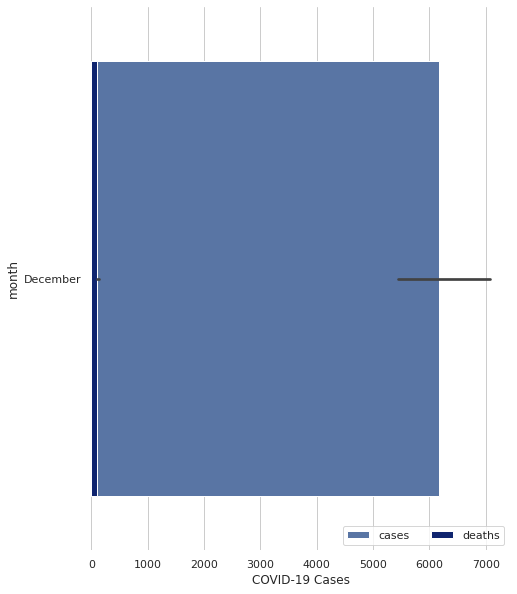

In [54]:
'''
Don't think this is doing what I think it's doing
'''

sns.set_theme(style='whitegrid')

f, ax = plt.subplots(figsize=(7.5,10))

sns.set_color_codes('deep')
sns.barplot(x='cases', y='month', data=data_2020, label='cases', color='b')

sns.set_color_codes('dark')
sns.barplot(x='deaths', y='month', data=data_2020, label='deaths', color='b')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(ylabel='month', xlabel='COVID-19 Cases')
sns.despine(left=True, bottom=True)

# Analysis of COVID-19 Cases in NYC from Dec. 2020 to Jan. 2021

In [88]:
nyc_data = data[(data['state'] == 'New York') & (data['county'] == 'New York City')].reset_index(drop=True)

In [89]:
nyc_data

,date,county,state,fips,cases,deaths,month,day,day of month,year
0,2020-03-01,New York City,New York,NaN,1,0.0,March,Sunday,1,2020
1,2020-03-02,New York City,New York,NaN,1,0.0,March,Monday,2,2020
2,2020-03-03,New York City,New York,NaN,2,0.0,March,Tuesday,3,2020
3,2020-03-04,New York City,New York,NaN,2,0.0,March,Wednesday,4,2020
4,2020-03-05,New York City,New York,NaN,4,0.0,March,Thursday,5,2020
...,...,...,...,...,...,...,...,...,...,...
317,2021-01-12,New York City,New York,NaN,498877,25698.0,January,Tuesday,12,2021
318,2021-01-13,New York City,New York,NaN,504826,25741.0,January,Wednesday,13,2021
319,2021-01-14,New York City,New York,NaN,510711,25834.0,January,Thursday,14,2021
320,2021-01-15,New York City,New York,NaN,517963,25909.0,January,Friday,15,2021


[Text(0.5, 0, 'day'),
 Text(0.5, 1.0, 'COVID-19 Cases Since First Report - NYC')]

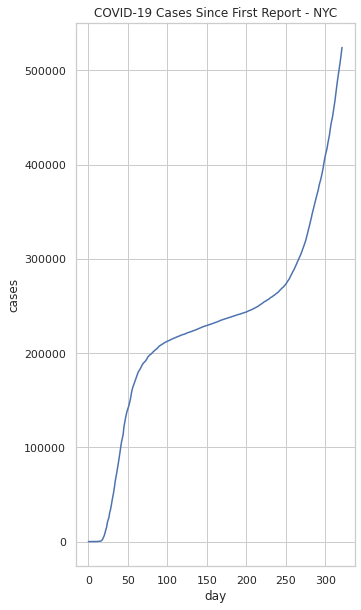

In [102]:
plt.figure(figsize=(5,10))
sns.lineplot(data=nyc_data['cases']).set(title='COVID-19 Cases Since First Report - NYC', xlabel='day')

In [96]:
last_30_nyc = nyc_data.tail(30).reset_index(drop=True)

last_30_nyc

,date,county,state,fips,cases,deaths,month,day,day of month,year
0,2020-12-18,New York City,New York,NaN,377728,24652.0,December,Friday,18,2020
1,2020-12-19,New York City,New York,NaN,381067,24677.0,December,Saturday,19,2020
2,2020-12-20,New York City,New York,NaN,383808,24697.0,December,Sunday,20,2020
3,2020-12-21,New York City,New York,NaN,387595,24735.0,December,Monday,21,2020
4,2020-12-22,New York City,New York,NaN,391634,24768.0,December,Tuesday,22,2020
5,2020-12-23,New York City,New York,NaN,395810,24790.0,December,Wednesday,23,2020
6,2020-12-24,New York City,New York,NaN,401251,24842.0,December,Thursday,24,2020
7,2020-12-25,New York City,New York,NaN,405857,24889.0,December,Friday,25,2020
8,2020-12-26,New York City,New York,NaN,410048,24931.0,December,Saturday,26,2020
9,2020-12-27,New York City,New York,NaN,413472,24973.0,December,Sunday,27,2020


[Text(0.5, 0, 'day'), Text(0.5, 1.0, 'COVID-19 Cases Over Last 30 Days - NYC')]

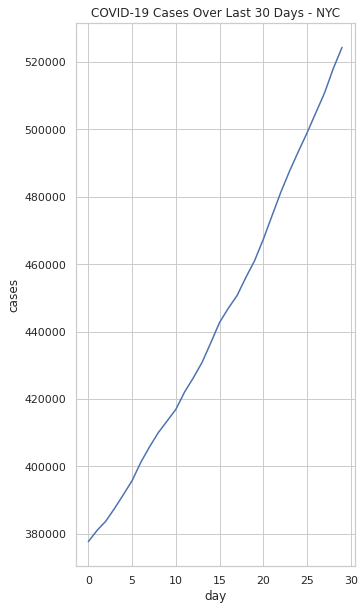

In [100]:
plt.figure(figsize=(5,10))
sns.lineplot(data=last_30_nyc['cases']).set(title='COVID-19 Cases Over Last 30 Days - NYC', xlabel='day')

# Comparing COVID-19 Cases in NY to Other States